In [4]:
import wandb
import numpy as np

api = wandb.Api()
entity, project = "shreyaspadhy", "scalable-gps"  # set to your entity and project 
sweep_id = "nvwcugna"  # Protein
sweep = api.sweep(f"{entity}/{project}/{sweep_id}")
runs = sweep.runs

lengthscales = []
signalscales = []

noisescales = []

for run in runs:
    print(run.name)

    history = run.scan_history()
    l = [row["length_scale"] for row in history]
    lengthscales.append(l[-1])
    
    s = [row["signal_scale"] for row in history]
    signalscales.append(s[-1])
    
    n = [row["noise_scale"] for row in history]
    noisescales.append(n[-1])

lengthscales  = np.array(lengthscales)
signalscales = np.array(signalscales)
noisescales = np.array(noisescales)

print(lengthscales.shape, signalscales.shape, noisescales.shape)

print(np.mean(lengthscales, axis=0))
print(np.mean(signalscales))
print(np.mean(noisescales))

stellar-sweep-5
worldly-sweep-4
fast-sweep-3
driven-sweep-2
upbeat-sweep-1
(5, 9) (5,) (5,)
[0.39719116 2.70550394 0.8316101  0.21243448 0.37867384 0.315153
 0.12718033 0.35584376 0.27604335]
0.8629741787910461
0.07735464163124561


In [5]:
import matplotlib.pyplot as plt
import matplotlib
c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', 
     '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

text_width = 5.50107  # in  --> Confirmed with template explanation

fs_m1 = 6  # for figure ticks
fs = 8  # for regular figure text
fs_p1 = 9  # figure titles

matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title


matplotlib.rc('font', **{'family': 'serif', 'serif': ['Palatino']})

In [15]:
import wandb
import numpy as np

api = wandb.Api()
entity, project = "shreyaspadhy", "scalable-gps"  # set to your entity and project 
runs = api.runs(entity + "/" + project)

mlls = {}

test_rmses = {}

norm_test_rmses = {}

# Pol
# names = {
#     'exact gp avged hparams': 'Exact GP Avg. Hparams',
#     'mll ard=True full dataset': 'Exact GP',
#     'mll 10k subsample key=4': '10k subsample key=4',
#     'mll pol 10k subsample key=3': '10k subsample key=3',
#     'mll pol 10k subsample key=2': '10k subsample key=2',
#     'mll pol 10k subsample key=1': '10k subsample key=1',
#     'mll pol 10k subsample key=0': '10k subsample key=0',}

# Protein
names = {
    'protein exact gp, avg hparams': 'Exact GP Avg. Hparams',
    'protein exact-gp mll': 'Exact GP',
    'stellar-sweep-5': '10k subsample key=4',
    'worldly-sweep-4': '10k subsample key=3',
    'fast-sweep-3': '10k subsample key=2',
    'driven-sweep-2': '10k subsample key=1',
    'upbeat-sweep-1': '10k subsample key=0',
    }

num_points = {}
for run in runs[:8]:
    print(run.name)
    history = run.scan_history()
    num_points[run.name] = 41157 if run.name == 'protein exact gp, avg hparams' or run.name == 'protein exact-gp mll' else 10000
    mlls[run.name] = [row["mll"] for row in history]
    test_rmses[run.name] = [row["test_rmse"] for row in history]
    norm_test_rmses[run.name] = [row["normalised_test_rmse"] for row in history]


protein exact gp
protein exact gp, avg hparams
stellar-sweep-5
worldly-sweep-4
fast-sweep-3
driven-sweep-2
upbeat-sweep-1
protein exact-gp mll


findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following 

dict_keys(['protein exact gp', 'protein exact gp, avg hparams', 'stellar-sweep-5', 'worldly-sweep-4', 'fast-sweep-3', 'driven-sweep-2', 'upbeat-sweep-1', 'protein exact-gp mll'])


findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following families were found: Palatino
findfont: Generic family 'serif' not found because none of the following 

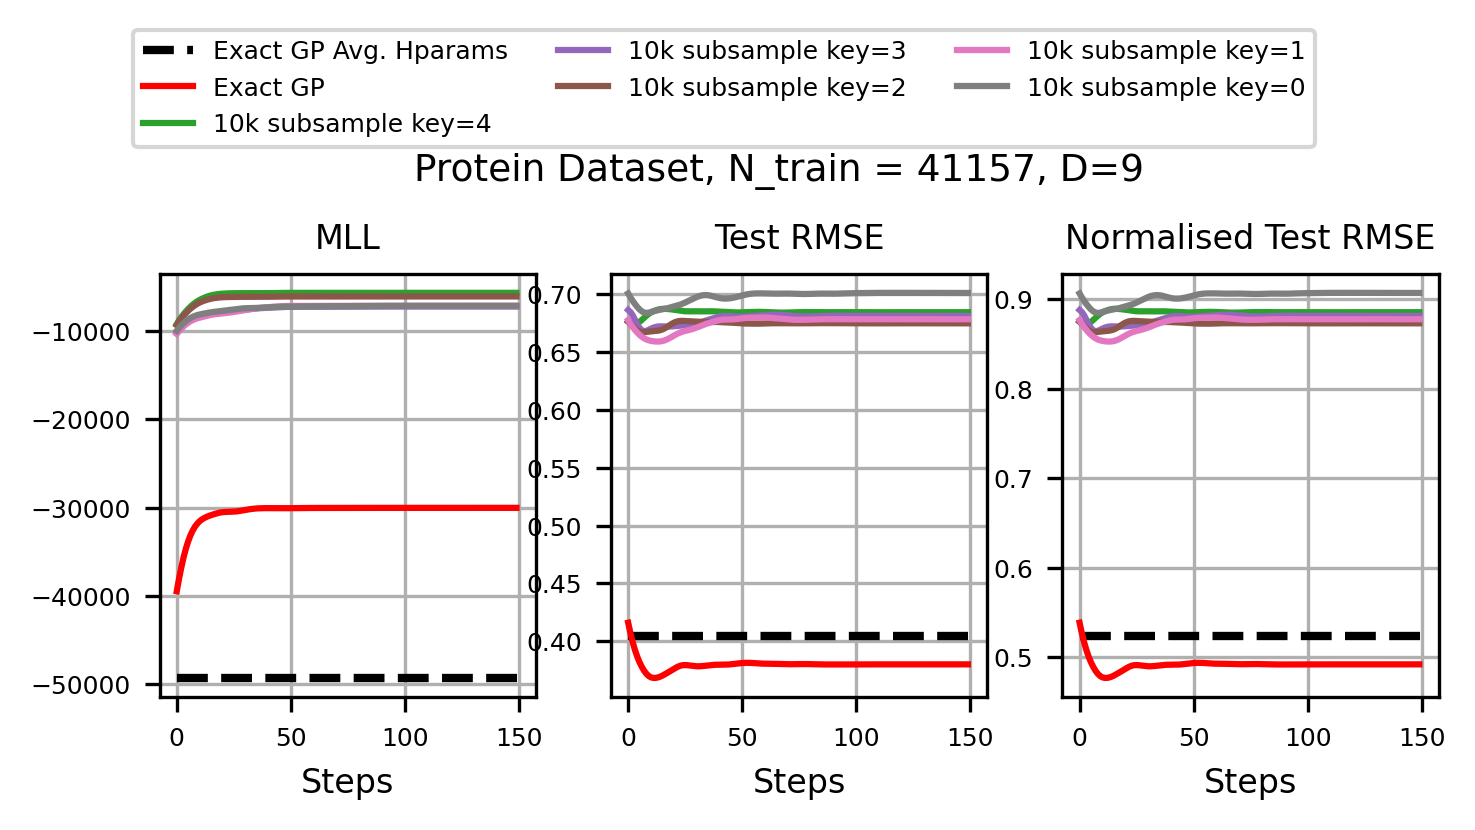

In [20]:
import matplotlib.pyplot as plt
import matplotlib

print(mlls.keys())
fig, ax = plt.subplots(1, 3, figsize=(text_width, text_width/3), dpi=300)
for i, (name, clean_name) in enumerate(names.items()):
    ax[0].grid(0.3, zorder=0)
    ax[1].grid(0.3, zorder=0)
    ax[2].grid(0.3, zorder=0)
    if clean_name == 'Exact GP Avg. Hparams':
        ax[0].hlines(y=mlls[name][0] * num_points[name], xmin=0, xmax=150, linewidth=2, ls='--', color='k', label=clean_name)
        ax[1].hlines(y=test_rmses[name][0], xmin=0, xmax=150, linewidth=2, ls='--', color='k', label=clean_name)
        ax[2].hlines(y=norm_test_rmses[name][0], xmin=0, xmax=150, linewidth=2, ls='--', color='k', label=clean_name)
    else:
        color=c[i] if clean_name != "Exact GP" else 'r'
        lw = 1 if clean_name != "Exact GP" else 2
        if clean_name == "Exact GP":
            mll = np.array(mlls[name][:150])
        else:
            mll = np.array(mlls[name][:150]) * num_points[name]
        ax[0].plot(mll, label=clean_name, color=color)
        ax[1].plot(test_rmses[name][:150], label=clean_name, color=color)
        ax[2].plot(norm_test_rmses[name][:150], label=clean_name, color=color)
    
    ax[0].set_title('MLL')
    ax[1].set_title('Test RMSE')
    ax[2].set_title('Normalised Test RMSE')
    
    ax[0].set_xlabel('Steps')
    ax[1].set_xlabel('Steps')
    ax[2].set_xlabel('Steps')

fig.suptitle('Protein Dataset, N_train = 41157, D=9', y=1.1)
# Make legend clean and on bottom of figure
ax[0].legend(bbox_to_anchor=(1.5, 1.3), loc='lower center', borderaxespad=0., ncol=3)
plt.tight_layout()
plt.show()
    
    